# PARTE A: stima della massa

raccolte misure dell'accelerazione in funzione della forza

0.2530306490581693 0.0016006197146962752
0.24735307708280946 0.0034973425566675203


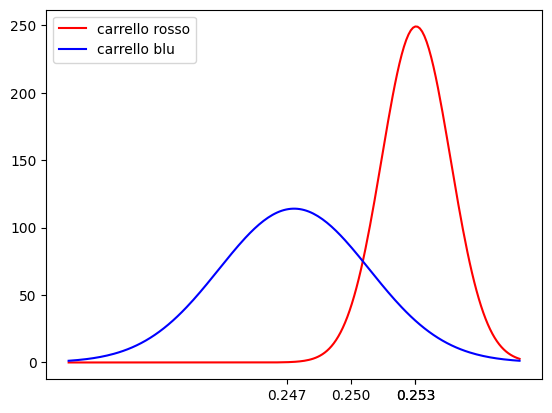

In [17]:
import numpy as np
import pandas as pd
import os
import scipy.stats as sc
import matplotlib.pyplot as plt

PATH = os.path.abspath('')
FILE = PATH + '/../CSV/Fma_parteA.csv'
fr = pd.read_csv(FILE)

mR = np.array(fr['m ROSSO'])
sigmamR = np.array(fr['sigmam ROSSO']) # sottostimati da capstone ma usati per media pesata
wR = 1 / sigmamR**2
mB = np.array(fr['m BLU'])
sigmamB = np.array(fr['sigmam BLU'])
wB = 1 / sigmamB**2

# plt.hist(mR,bins=11, density=True)
# plt.hist(mB,bins=11, density=True)

sigmamR = np.std(mR)
sigmamB = np.std(mB)
mR = np.average(mR, weights=wR)
mB = np.average(mB, weights=wB)

x = np.linspace(min(mR-3*sigmamR,mB-3*sigmamB),max(mR+3*sigmamR,mB+3*sigmamB),200)
R = sc.norm.pdf(x,loc=mR,scale=sigmamR)
plt.plot(x,R, color='red', label='carrello rosso')

B = sc.norm.pdf(x,loc=mB,scale=sigmamB)
plt.plot(x,B, color='blue',label='carrello blu')

plt.xticks(np.round([mB,mR,0.250,0.253],3))


print(mR,sigmamR)
print(mB,sigmamB)

plt.legend()
plt.show()